<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/template%20Series%20temporales/FacebookProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreria Facebook Prophet

## Carga de datos

In [1]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/cccg8105/curso-series-temporales/master/12.%20Prediciendo%20el%20futuro/Python/BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Formateo de datos

In [16]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

df.sample(15)

,ds,y
304,2017-05-01,4647
316,2018-05-01,4897
83,1998-12-01,3037
61,1997-02-01,1621
195,2008-04-01,2997
191,2007-12-01,4403
290,2016-03-01,4051
293,2016-06-01,4474
13,1993-02-01,1529
179,2006-12-01,4269


## Entrenamiento

In [3]:
m = Prophet(interval_width=0.95)
# m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Predicción

### Generando fechas futuras

In [5]:
future = m.make_future_dataframe(periods=24,freq = 'MS') # 2 años adicionales
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


### Predicción de valores

In [7]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.687845,5073.373428,5408.295117,5188.688422,5210.821873,39.924918,39.924918,39.924918,39.924918,39.924918,39.924918,0.0,0.0,0.0,5240.612763
344,2020-09-01,5216.751615,4907.745577,5237.948766,5203.512201,5227.576890,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,-133.372206,0.0,0.0,0.0,5083.379410
345,2020-10-01,5232.297199,5039.557461,5367.891405,5218.141973,5243.937986,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,-43.375085,0.0,0.0,0.0,5188.922115
346,2020-11-01,5248.360970,5180.173160,5501.347416,5233.024259,5260.871378,87.856779,87.856779,87.856779,87.856779,87.856779,87.856779,0.0,0.0,0.0,5336.217749
347,2020-12-01,5263.906554,6167.333972,6497.356267,5247.190556,5277.415183,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,1070.533455,0.0,0.0,0.0,6334.440008


In [9]:
forecast.columns # nombres de columnas

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.559148,4460.137416,4798.056695
337,2020-02-01,4679.231311,4522.417987,4838.336156
338,2020-03-01,4942.493052,4779.373869,5108.043020
339,2020-04-01,4941.412350,4777.576377,5095.818185
340,2020-05-01,5198.212046,5041.633377,5356.413925
341,2020-06-01,5178.840512,4998.557544,5338.109456
342,2020-07-01,5311.075537,5143.148643,5477.361880
343,2020-08-01,5240.612763,5073.373428,5408.295117
344,2020-09-01,5083.379410,4907.745577,5237.948766
345,2020-10-01,5188.922115,5039.557461,5367.891405


### Grafico del pronostico

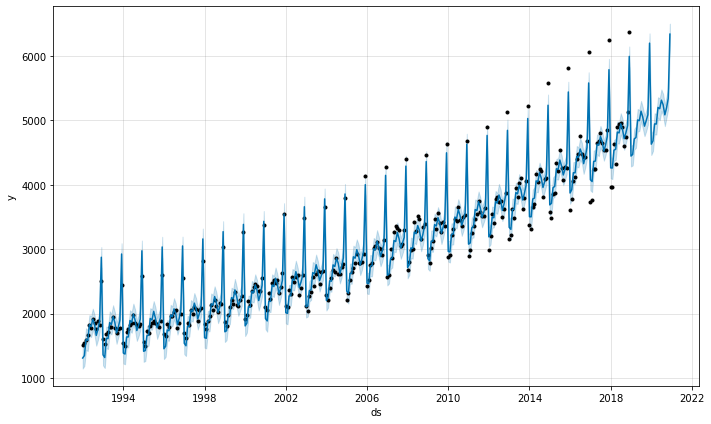

In [10]:
m.plot(forecast);

(735234.0, 738156.0)

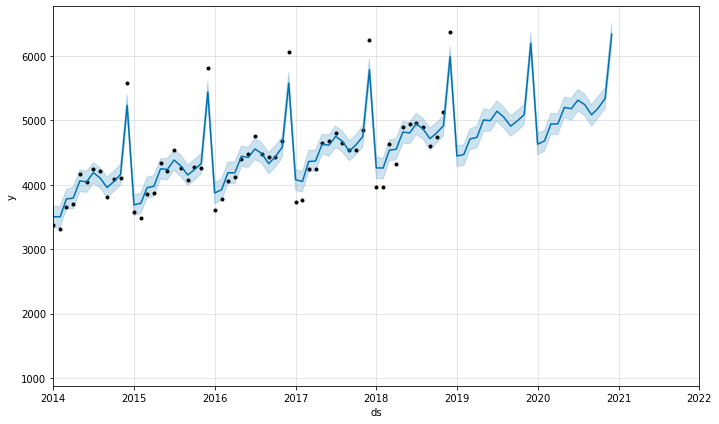

In [11]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

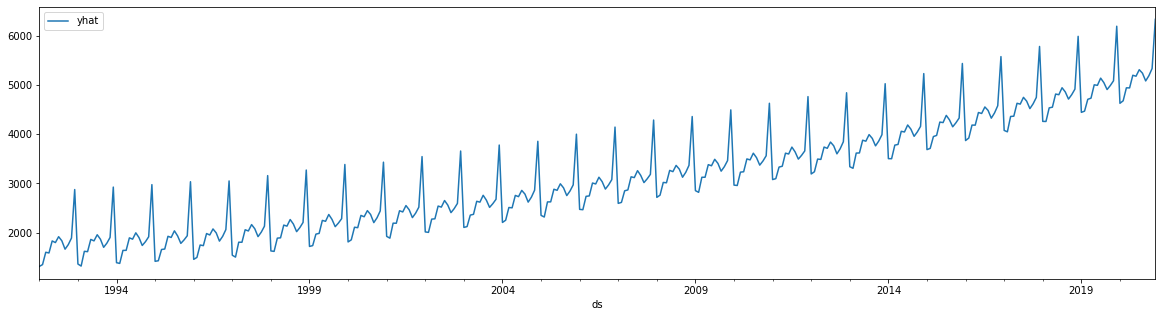

In [14]:
forecast.plot(x='ds',y='yhat', figsize = (20,5))

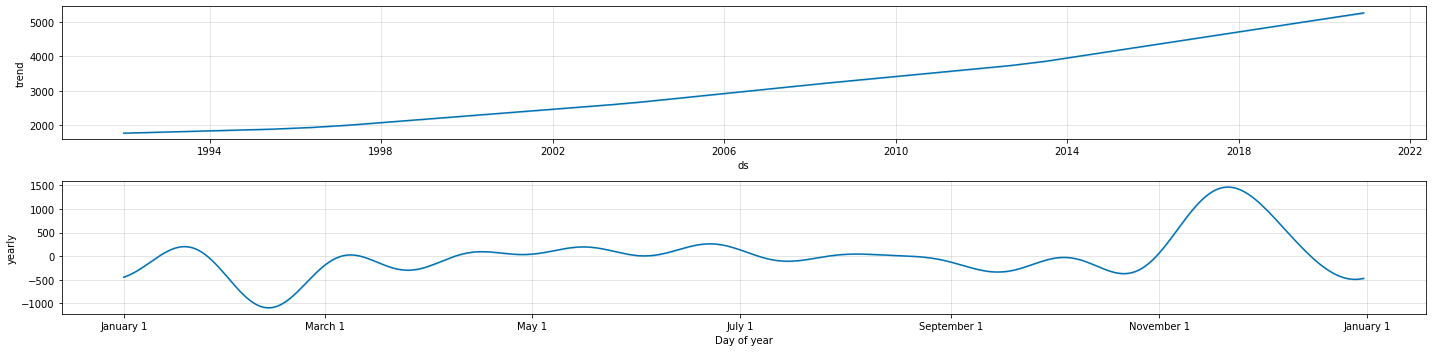

In [15]:
m.plot_components(forecast, figsize = (20,5));